# Passenger information for the MRT Chaloem Ratchamongkhon Line and Chalong Ratchadham Line 🚄
Create by Piyadet Kitphadung

<p align="center">
  <img src="download.jfif" alt="download">
</p>

<p align="center">
  Data From : <a href="https://data.go.th/dataset/mrta-crmk">https://data.go.th/dataset/mrta-crmk</a>
</p>

In [26]:
-- Query a CSV file:
SELECT * FROM 'total_passenger_subway_blue_and_purple_57_65.csv'

,month,year,line,total_passenger,avg_daily_passenger,avg_daily_work_passenger,avg_daily_day_off_passenger
0,January,2557,Blue_Line,"8,613,608","277,858","316,029","184,553"
1,February,2557,Blue_Line,"8,212,613","293,308","329,204","217,526"
2,March,2557,Blue_Line,"8,123,428","262,046","287,668","208,239"
3,April,2557,Blue_Line,"6,990,396","233,013","285,863","153,738"
4,May,2557,Blue_Line,"7,265,594","234,374","276,809","175,618"
...,...,...,...,...,...,...,...
174,May,2565,Purple_Line,"1,198,303","38,655","47,597","26,274"
175,June,2565,Purple_Line,"1,460,459","48,682","56,948","29,394"
176,July,2565,Purple_Line,"1,399,784","45,154","58,720","30,684"
177,August,2565,Purple_Line,"1,608,598","51,890","60,880","29,917"


Drop off Column >>>

In [27]:
df = df[df['year'] >= 2559]

Change Dtypes >>>

In [28]:
df['total_passenger'] = df['total_passenger'].astype(str).str.replace(',', '').astype(int)
df['avg_daily_passenger'] = df['avg_daily_passenger'].astype(str).str.replace(',', '').astype(int)
df['avg_daily_work_passenger'] = df['avg_daily_work_passenger'].astype(str).str.replace(',', '').astype(int)
df['avg_daily_day_off_passenger'] = df['avg_daily_day_off_passenger'].astype(str).str.replace(',', '').astype(int)

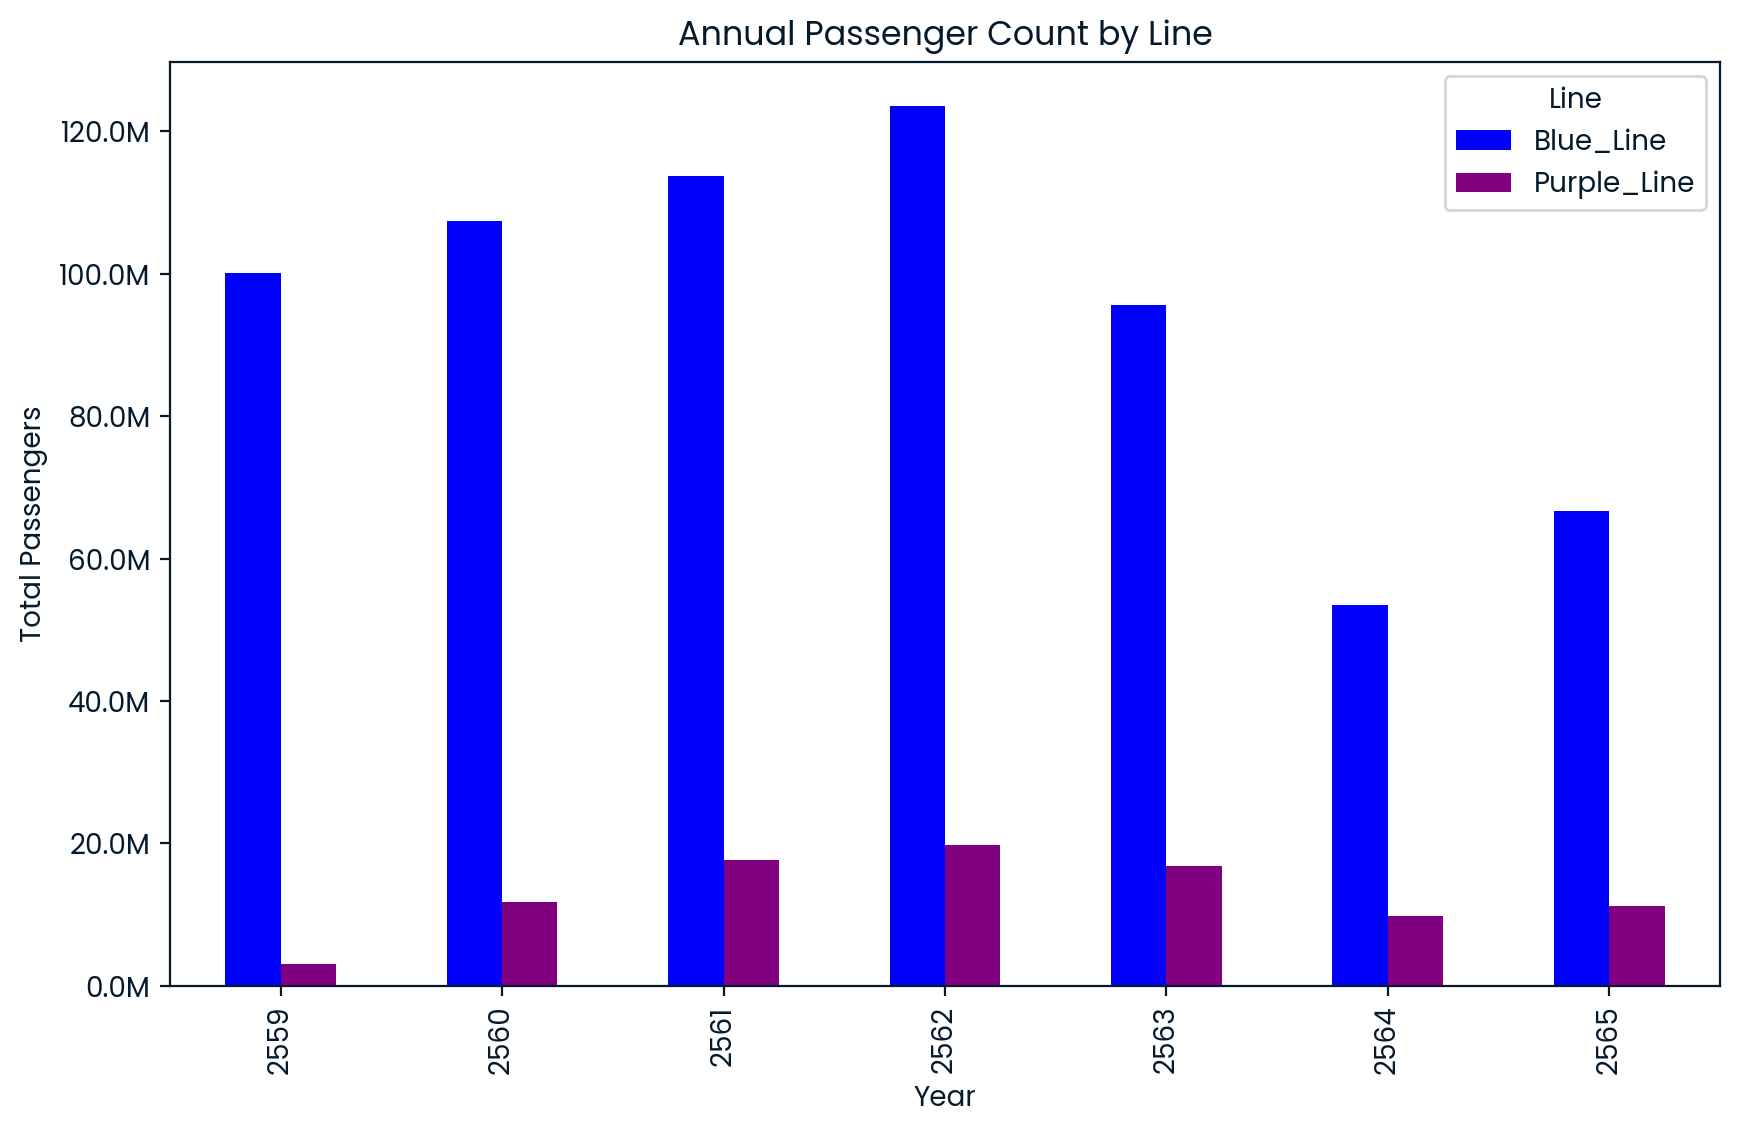

In [52]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Group by year and line, then sum the total passengers
annual_passengers = df.groupby(['year', 'line'])['total_passenger'].sum().unstack()

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
annual_passengers.plot(kind='bar', ax=ax, color={'Blue_Line': 'blue', 'Purple_Line': 'purple'})

# Set the title and labels
ax.set_title('Annual Passenger Count by Line')
ax.set_xlabel('Year')
ax.set_ylabel('Total Passengers')

# Format y-axis to show numbers in millions
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x*1e-6:.1f}M'))

# Show the legend
ax.legend(title='Line')

# Display the plot
plt.show()

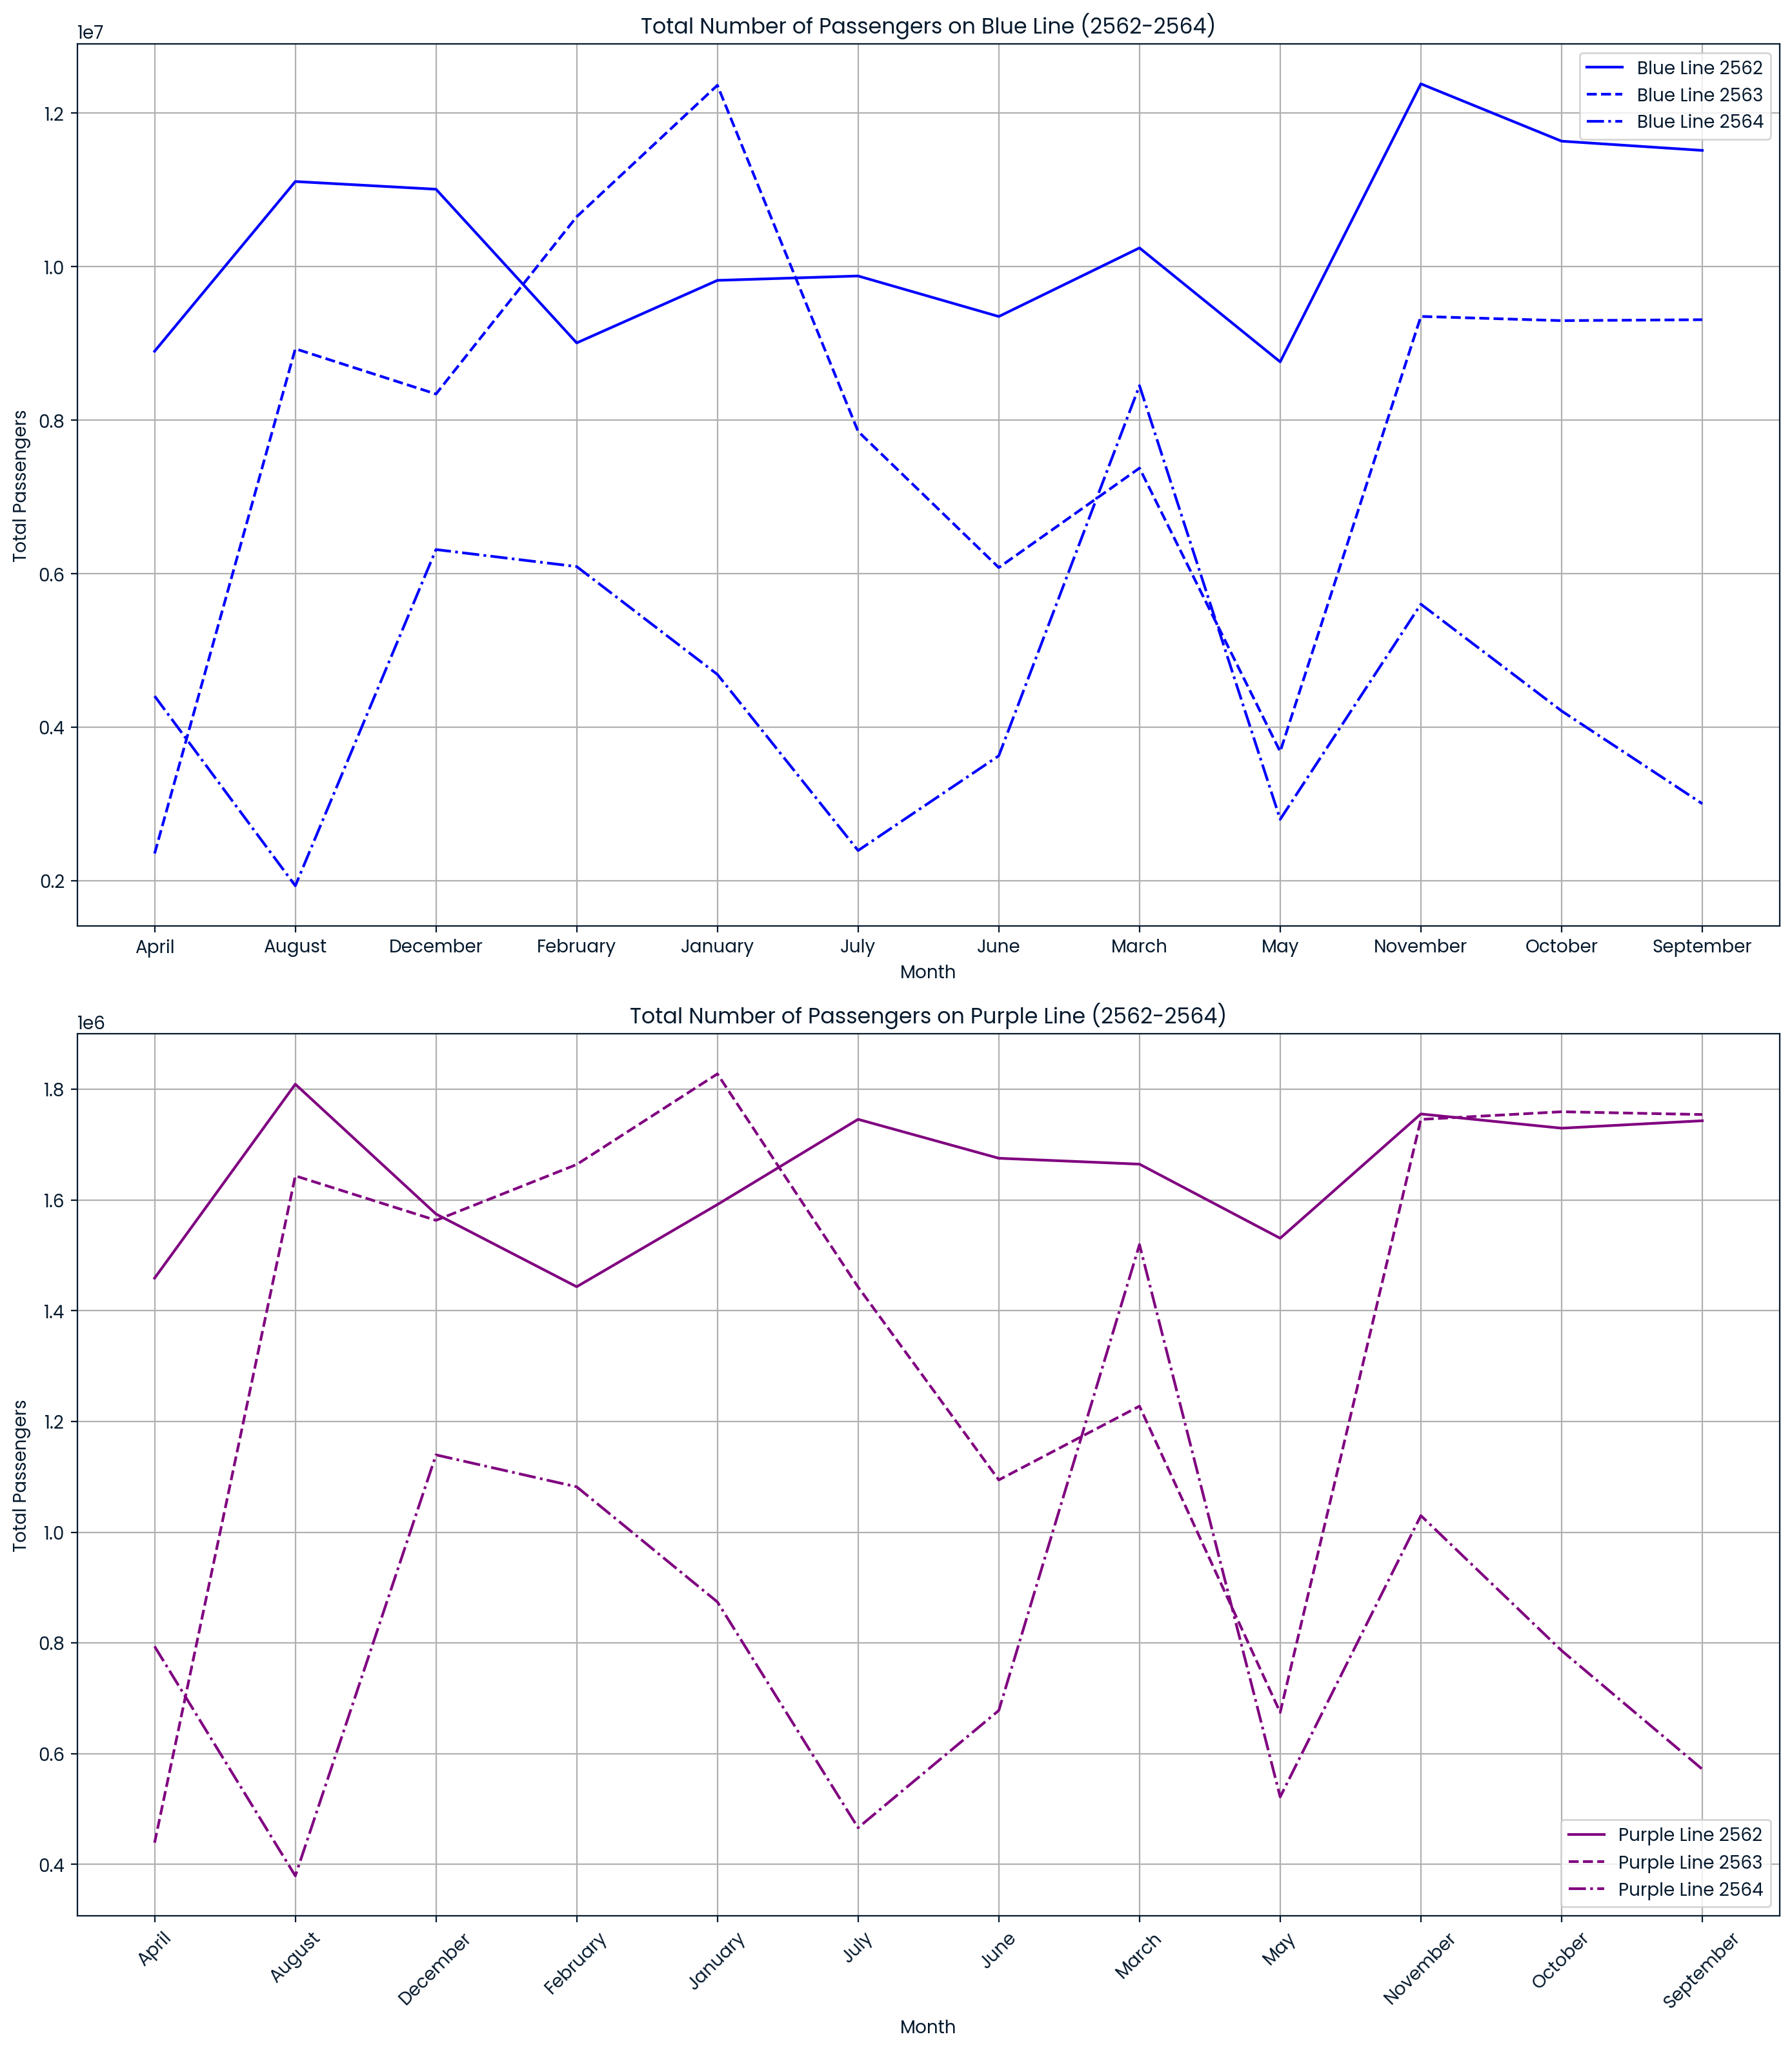

In [64]:
import matplotlib.pyplot as plt

# Filter the dataframe for the years 2562, 2563, and 2564
filtered_df = df[df['year'].isin([2562, 2563, 2564])]

# Pivot the dataframe to get total passengers per month for each line
pivot_df = filtered_df.pivot_table(index='month', columns=['year', 'line'], values='total_passenger', aggfunc='sum')

# Plotting the data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 16))

# Define colors and line styles for the lines
colors = {'Blue_Line': 'blue', 'Purple_Line': 'purple'}
line_styles = {2562: '-', 2563: '--', 2564: '-.'}

# Plot each year for Blue Line
for year in [2562, 2563, 2564]:
    if (year, 'Blue_Line') in pivot_df.columns:
        ax1.plot(pivot_df.index, pivot_df[(year, 'Blue_Line')], label=f'Blue Line {year}', color=colors['Blue_Line'], linestyle=line_styles[year])

# Set the title and labels for Blue Line
ax1.set_title('Total Number of Passengers on Blue Line (2562-2564)')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Passengers')
ax1.legend()
ax1.grid(True)

# Plot each year for Purple Line
for year in [2562, 2563, 2564]:
    if (year, 'Purple_Line') in pivot_df.columns:
        ax2.plot(pivot_df.index, pivot_df[(year, 'Purple_Line')], label=f'Purple Line {year}', color=colors['Purple_Line'], linestyle=line_styles[year])

# Set the title and labels for Purple Line
ax2.set_title('Total Number of Passengers on Purple Line (2562-2564)')
ax2.set_xlabel('Month')
ax2.set_ylabel('Total Passengers')
ax2.legend()
ax2.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Format y-axis to show numbers in millions
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x*1e-6:.1f}M'))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Decline in Metro Passengers in Thailand 2563
The significant drop in ridership on both weekdays and weekends in 2023 (2563) was primarily due to the COVID-19 pandemic. Here's a breakdown of the reasons: Lockdown measures and work-from-home policies: Restrictions on movement and remote work options led to a decrease in overall travel demand.
Fear of infection: Concerns about catching the virus in crowded spaces like trains led many to opt for private vehicles or avoid non-essential travel.
Reduced flights and tourism: The pandemic's impact on the travel industry resulted in fewer tourists, a key user group for services like airport rail links.
Shifts in travel behavior: Passengers adapted their commutes, choosing off-peak hours or less crowded routes to minimize infection risks.

<p align="center">
  <img src="train.jpg" alt="train">
</p>

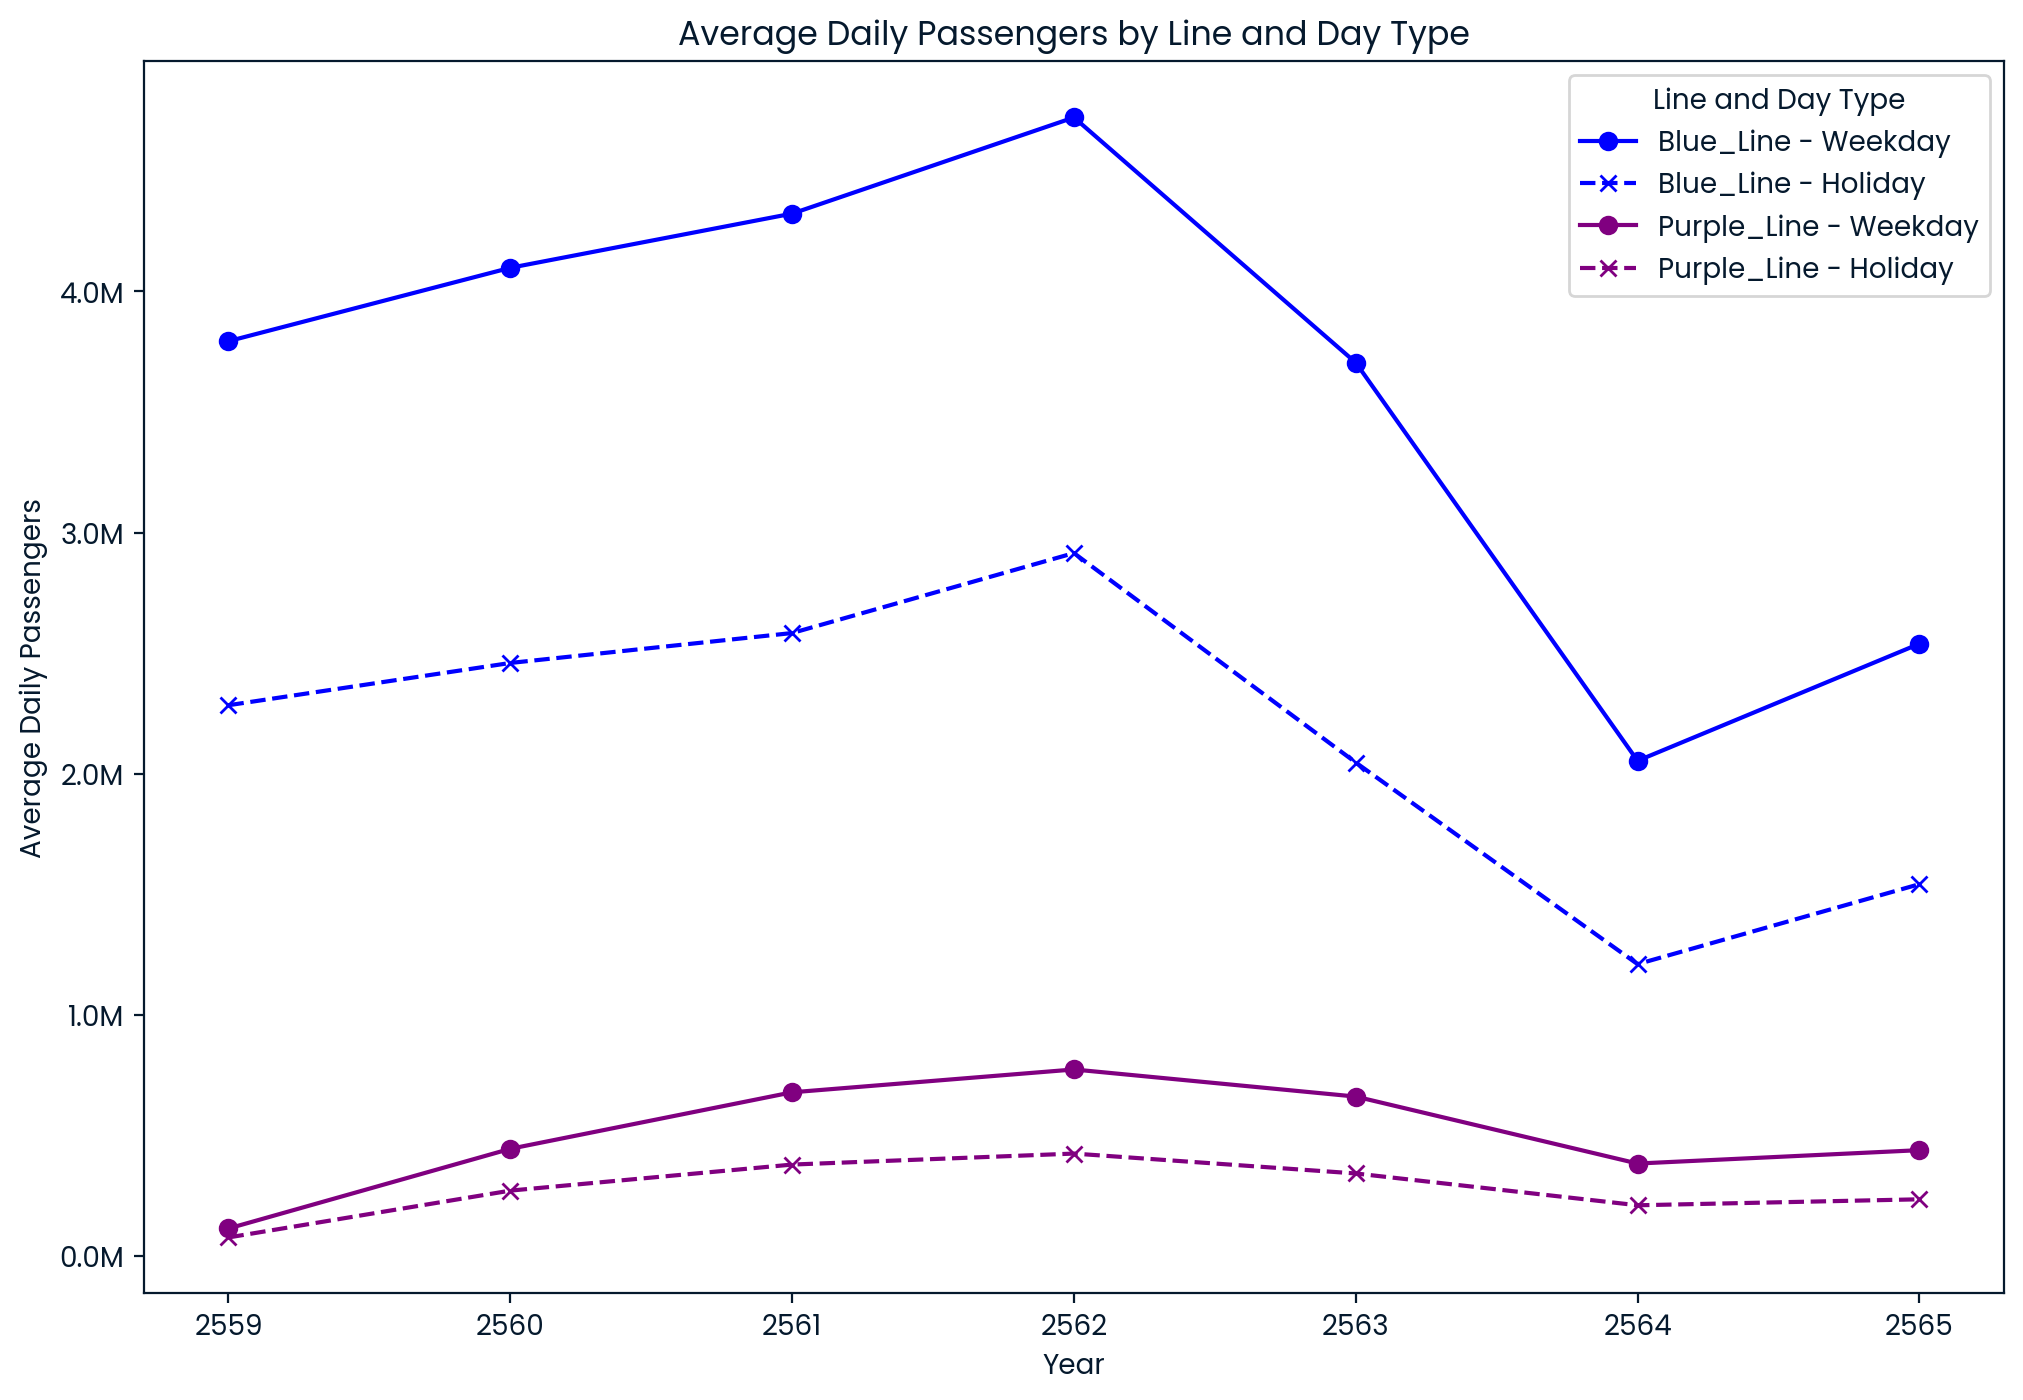

In [58]:
# Define a color map for each line
color_map = {
    'Blue_Line': 'blue',
    'Purple_Line': 'purple'
}

# Group by year and line, then sum the average daily work and day off passengers
annual_avg_passengers = df.groupby(['year', 'line'])[['avg_daily_work_passenger', 'avg_daily_day_off_passenger']].sum().unstack()

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

# Plot for each line
for line in annual_avg_passengers.columns.levels[1]:
    ax.plot(annual_avg_passengers.index, annual_avg_passengers['avg_daily_work_passenger'][line], 
            label=f'{line} - Weekday', linestyle='-', marker='o', color=color_map[line])
    ax.plot(annual_avg_passengers.index, annual_avg_passengers['avg_daily_day_off_passenger'][line], 
            label=f'{line} - Holiday', linestyle='--', marker='x', color=color_map[line])

# Set the title and labels
ax.set_title('Average Daily Passengers by Line and Day Type')
ax.set_xlabel('Year')
ax.set_ylabel('Average Daily Passengers')

# Format y-axis to show numbers in millions
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x*1e-6:.1f}M'))

# Show the legend
ax.legend(title='Line and Day Type')

# Display the plot
plt.show()